**Нижаметдинов Мансур Шамилевич ИУ5-21М**

**Вариант 10**

Номер задачи №1: 10

Номер задачи №2: 30

Дополнительные требования:

Для пары произвольных колонок данных построить график "Диаграмма рассеяния"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# Set plot styles
sns.set(style='whitegrid', context='notebook')
%matplotlib inline

# Load the Linnerud dataset
exercise = pd.read_csv('https://raw.githubusercontent.com/mansurik1/MMO2025_works/refs/heads/master/rk1/datasets/linnerud/linnerud_exercise.csv')
physiological = pd.read_csv('https://raw.githubusercontent.com/mansurik1/MMO2025_works/refs/heads/master/rk1/datasets/linnerud/linnerud_physiological.csv')


df = pd.concat([exercise, physiological], axis=1)
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5,162,60,191.0,36,50
1,2,110,60,189.0,37,52
2,12,101,101,NaN,38,58
3,12,105,37,162.0,35,62
4,13,155,58,189.0,35,46


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     int64  
 1   Situps  20 non-null     int64  
 2   Jumps   20 non-null     int64  
 3   Weight  17 non-null     float64
 4   Waist   20 non-null     int64  
 5   Pulse   20 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 KB
None
           Chins      Situps      Jumps      Weight      Waist      Pulse
count  20.000000   20.000000   20.00000   17.000000  20.000000  20.000000
mean    9.450000  145.550000   70.30000  178.470588  35.400000  56.100000
std     5.286278   62.566575   51.27747   26.547405   3.201973   7.210373
min     1.000000   50.000000   25.00000  138.000000  31.000000  46.000000
25%     4.750000  101.000000   39.50000  157.000000  33.000000  51.500000
50%    11.500000  122.500000   54.00000  176.000000  35.000000  55.000000
75%    13.250000  210.000000 

# Задача 1

Для набора данных проведите устранение пропусков для одного (произвольного) категориального признака с использованием метода заполнения наиболее распространенным значением.

In [ ]:
df.isnull().sum()

,0
Chins,0
Situps,0
Jumps,0
Weight,3
Waist,0
Pulse,0


Закодируем поле Weight, чтобы были пропуски в категориальном признаке

In [ ]:
def encode_weight_ufc_category(Weight):
    if pd.isnull(Weight):
        return np.nan
    if Weight < 125:
        return 'Flyweight'
    elif Weight < 135:
        return 'Bantamweight'
    elif Weight < 145:
        return 'Featherweight'
    elif Weight < 155:
        return 'Lightweight'
    elif Weight < 170:
        return 'Welterweight'
    elif Weight < 185:
        return 'Middleweight'
    elif Weight < 205:
        return 'Light Heavyweight'
    else:
        return 'Heavyweight'

df['weight_category'] = df['Weight'].apply(encode_weight_ufc_category)

In [ ]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse,weight_category
0,5,162,60,191.0,36,50,Light Heavyweight
1,2,110,60,189.0,37,52,Light Heavyweight
2,12,101,101,NaN,38,58,NaN
3,12,105,37,162.0,35,62,Welterweight
4,13,155,58,189.0,35,46,Light Heavyweight


In [ ]:
df.isnull().sum()

,0
Chins,0
Situps,0
Jumps,0
Weight,3
Waist,0
Pulse,0
weight_category,3


Заполним пропуски в поле Weight с использованием метода заполнения наиболее распространенным значением

In [ ]:
most_common_value = df['weight_category'].mode()[0]
df['weight_category'].fillna(most_common_value, inplace=True)

df.isnull().sum()

<ipython-input-7-5c0022b34015>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight_category'].fillna(most_common_value, inplace=True)


,0
Chins,0
Situps,0
Jumps,0
Weight,3
Waist,0
Pulse,0
weight_category,0


In [ ]:
df.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse,weight_category
0,5,162,60,191.0,36,50,Light Heavyweight
1,2,110,60,189.0,37,52,Light Heavyweight
2,12,101,101,NaN,38,58,Light Heavyweight
3,12,105,37,162.0,35,62,Welterweight
4,13,155,58,189.0,35,46,Light Heavyweight


#Задача 2

Для набора данных проведите удаление повторяющихся признаков.
Повторяющиеся признаки в машинном обучении означают, что в наборе данных присутствуют признаки, которые имеют одинаковые или очень похожие значения для всех или большинства наблюдений. Такие признаки несут мало информации и могут быть избыточными для модели машинного обучения.

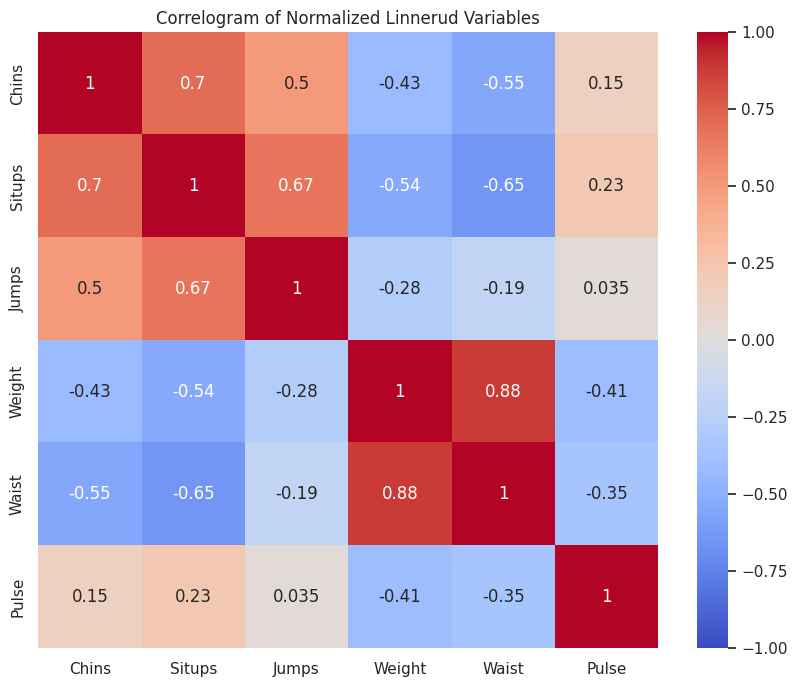

In [ ]:
corr = df[['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlogram of Normalized Linnerud Variables')
plt.show()

По корреляционной матрице видно, что коэффициент корреляции между признаками Weight и Waist равен 0.88, что близко к единице. Для улучшения качества модели может иметь смысл удаление одного из двух скоррелированных признаков. Удалим признак Waist:

In [ ]:
df.drop('Waist', axis=1, inplace=True)

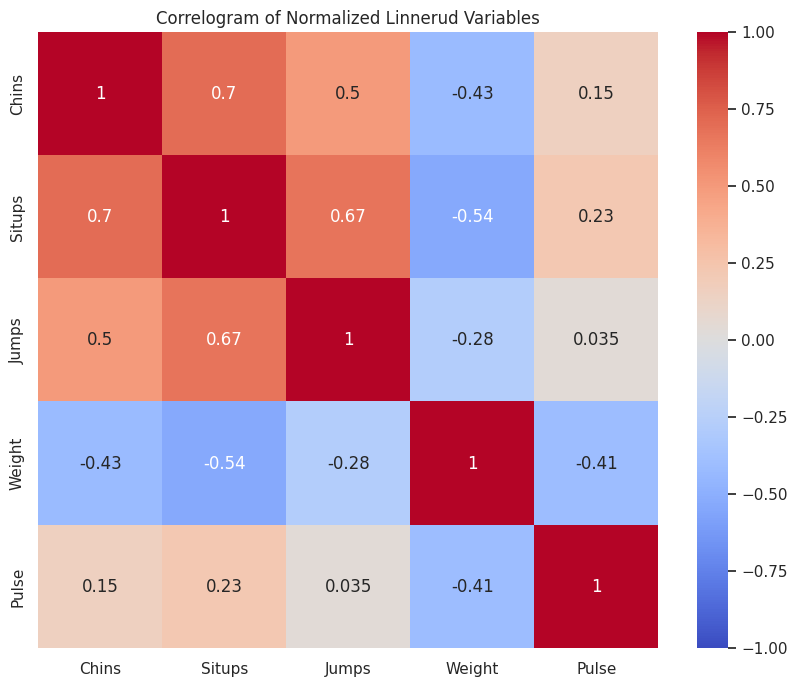

In [ ]:
corr = df[['Chins', 'Situps', 'Jumps', 'Weight', 'Pulse']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlogram of Normalized Linnerud Variables')
plt.show()

#Дополнительное задание

По диаграмме рассеяния можно отследить прямую корреляцию между числом подтягиваний и приседаний. Это может говорить о достаточно равномерной тренированности респондентов, результаты которых включены в набор данных

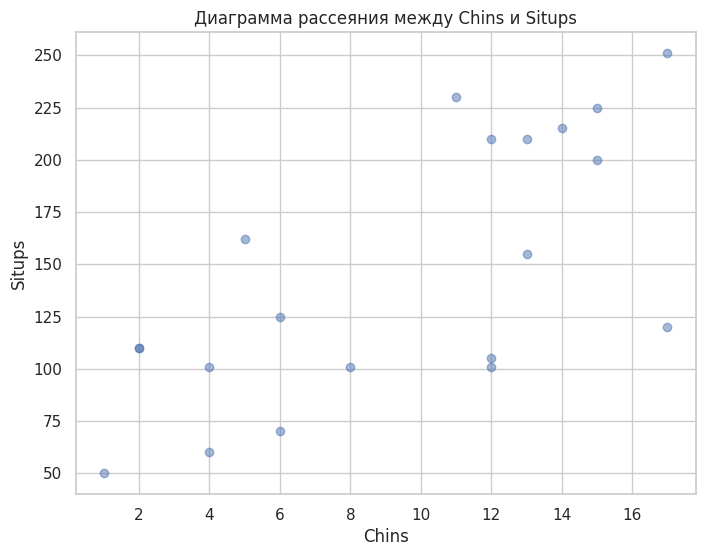

In [ ]:
import matplotlib.pyplot as plt

column1 = 'Chins'
column2 = 'Situps'

plt.figure(figsize=(8, 6))
plt.scatter(df[column1], df[column2], color='b', alpha=0.5)
plt.title('Диаграмма рассеяния между {} и {}'.format(column1, column2))
plt.xlabel(column1)
plt.ylabel(column2)
plt.grid(True)
plt.show()